    Timestamp  Temperature  Precipitation  Wind Speed  Wind Direction
0  1640995200    48.308952            0.0    4.802906       152.24146
1  1640998800    48.020950            0.0    5.149814       145.61966
2  1641002400    47.732952            0.0    5.061609       135.00000
3  1641006000    46.922950            0.0    4.787252       127.40535
4  1641009600    46.364952            0.0    4.802906       117.75854
The shape of our feature is: (7248, 5)
Precipitation (Y): [0. 0. 0. ... 0. 0. 0.]
Columns (X): ['Timestamp', 'Temperature', 'Wind Speed', 'Wind Direction']
Training data shape: (6523, 4)
Training labels shape: (6523,)
Testing data shape: (725, 4)
Testing label shape: (725,)
Wait...
Mean Absolute Error: 0.05 degrees.
Accuracy of logistic regression classifier on test set: 0.23


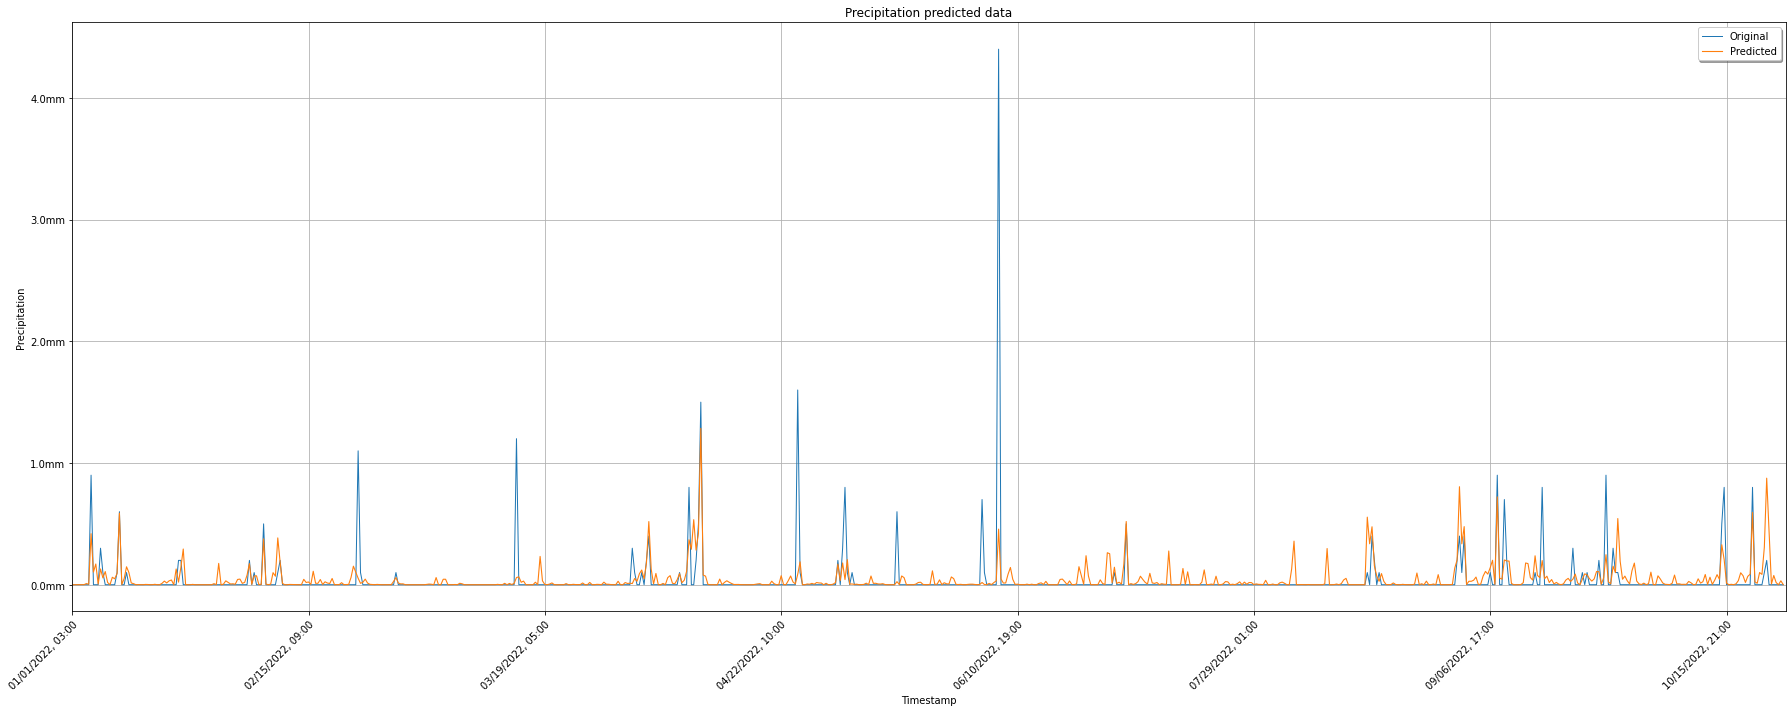

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/dgofman/PythonAI/main/AI-Final/dataexport_20221029T025321.csv', '/content/dataexport_20221029T025321.py')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

from time import mktime
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

epoc = lambda t : int(mktime(datetime.strptime(t, "%Y%m%dT%H%M%S").timetuple()))
data = pd.read_csv('/content/dataexport_20221029T025321.py', sep=',', converters={'Timestamp': epoc})

print(data.head(5))
print('The shape of our feature is:', data.shape)
data.describe()

data = pd.get_dummies(data)
data.head(5)

labels = np.array(data['Precipitation'])
data = data.drop('Precipitation', axis=1)
data_list = list(data.columns)
print('Precipitation (Y):', labels)
print('Columns (X):', data_list)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10,random_state=2)

print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', X_test.shape)
print('Testing label shape:', y_test.shape)
rf = RandomForestRegressor(n_estimators=2000, random_state=2)
print('Wait...')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

# Visualising the Random Forest Regression results

# sort values begin
order_list= []
keys = X_test['Timestamp'].keys()
for i, k in enumerate(keys):
    order_list.append({'index': i, 'value': k})
order_list = sorted(order_list, key=lambda item: item['value'])

x_values = []
y1_values = []
y2_values = []
for item in order_list:
    index = item['index']
    x_values.append(X_test['Timestamp'].values[index])
    y1_values.append(y_test[index]) #test data 
    y2_values.append(predictions[index]) #predicted data
# sort values end

def format(x, _):
    index = int(x)
    if index < len(x_values):
        ts = x_values[index]
    else:
        ts = x_values[-1]
    return datetime.fromtimestamp(ts).strftime('%m/%d/%Y, %H:%M')

length = len(x_values)
x_ax = range(length)
plt.figure(figsize=(25, 10))
plt.xlim(0, length)
plt.plot(x_ax, y1_values, linewidth=1, label='Original')
plt.plot(x_ax, y2_values, linewidth=1.1, label='Predicted')
plt.title('Precipitation predicted data')
plt.xlabel('Timestamp')
plt.ylabel('Precipitation')
plt.legend(loc='best',fancybox=True, shadow=True)

ax = plt.gca()
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_xticklabels(ticks_loc, rotation=45, ha='right', rotation_mode='anchor')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.1f}mm'.format(y)))

plt.grid(True)
plt.tight_layout()